# Strategy Performance Analysis

In [1]:
from IPython.core.display import display, HTML

display(HTML('''<script> code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>

<a href="javascript:code_toggle()">see notebook code clicking here</a>.'''))

In [2]:
import pandas as pd
from datetime import  datetime

from pandas_datareader.famafrench import get_available_datasets
import pandas_datareader.data as web

get_available_datasets()
# check data sets composition in: http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portfolios_ME_OP_5x5_Wout_Div',
 '25_Portfolios_ME_OP_5x5_daily',
 '100_Po

In [4]:
# FACTORS DATA
data = web.DataReader("Global_5_Factors", "famafrench",start = datetime(2011, 8, 31), end = datetime(2016, 3, 31))
data_df = data.values()[0]
data_df.index.rename(None,inplace=True)
data_df.index.to_timestamp(how='end')
############################################
# Mom Factor
d_mom_df = web.DataReader("F-F_Momentum_Factor", "famafrench",start = datetime(2011, 8, 31), end = datetime(2016, 3, 31)).values()[0]
d_mom_df.index.rename(None,'ignore')
############################################
# Merge
data_df = pd.merge(data_df,d_mom_df,how='inner',left_index=True,right_index=True)
data_df.head()

,Mkt-RF,SMB,HML,RMW,CMA,RF,Mom
2011-08,-7.51,-0.52,-1.79,2.70,-0.78,0.01,-0.31
2011-09,-9.20,-1.07,0.82,1.99,0.81,0.00,-2.55
2011-10,10.01,-2.33,-1.90,-0.37,-0.91,0.00,-1.42
2011-11,-2.64,-1.02,-0.74,1.48,0.57,0.00,3.99
2011-12,-0.44,-0.30,1.89,0.11,1.42,0.00,1.94


In [9]:
#2) Import Track Record
ff_import = pd.read_csv('track_record.csv')
ff_import['Unnamed: 0']=data_df.index # problems with original index format. We can use this because we now dates are the same.
ff_import.set_index('Unnamed: 0',inplace=True)
ff_import.index.rename(None,inplace=True)
ff_import.index.to_timestamp(how='end')
type(ff_import.index)

pandas.core.indexes.period.PeriodIndex

In [133]:
# 3) Merge FF and track record
df = pd.merge(ff_import,data_df, how='inner',left_index=True,right_index=True)
df.columns

Index([u'TR', u'Mkt-RF', u'SMB', u'HML', u'RMW', u'CMA', u'RF', u'Mom   '], dtype='object')

In [134]:
df.corr()

,TR,Mkt-RF,SMB,HML,RMW,CMA,RF,Mom
TR,1.000000,0.801910,-0.311482,-0.088517,-0.405059,-0.288433,-0.248617,-0.127605
Mkt-RF,0.801910,1.000000,-0.064590,0.079173,-0.546045,-0.307633,-0.100978,-0.337130
SMB,-0.311482,-0.064590,1.000000,0.109709,-0.425420,-0.115271,0.140276,-0.116311
HML,-0.088517,0.079173,0.109709,1.000000,-0.322842,0.518085,0.194440,-0.500897
RMW,-0.405059,-0.546045,-0.425420,-0.322842,1.000000,0.225890,0.113958,0.322640
CMA,-0.288433,-0.307633,-0.115271,0.518085,0.225890,1.000000,0.275229,0.017168
RF,-0.248617,-0.100978,0.140276,0.194440,0.113958,0.275229,1.000000,-0.204530
Mom,-0.127605,-0.337130,-0.116311,-0.500897,0.322640,0.017168,-0.204530,1.000000


## Multifactor Analysis

Firstly, we conducted an in-depth analysis using 2014 5-Factor Fama-French model on monthly returns: Market (Market-Risk Premium), SMB (Size Premium), HML (Value Premium), RMW (Operating Profitability Premium) and CMA(Low CapEx Intensity Premium) during the period 2016-2018:

https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2287202

The model below is robust explaining 76% volatility with almost all variables showcasing significant coeffs with the exception of CMA (Low CapEx Premium). "Intercept" positive and statistically significant coefficient is product of a proper stock-picking and sector/industry/theme selection.

In [11]:
df.columns

Index([u'TR', u'Mkt-RF', u'SMB', u'HML', u'RMW', u'CMA', u'RF', u'Mom   '], dtype='object')

In [31]:
import pandas as pd
import statsmodels.formula.api as sm
MKT = list(df.loc[:,'Mkt-RF']) # Market Return
SMB = list(df.loc[:,'SMB']) # Size Premium
HML = list(df.loc[:,'HML']) # Value Premium
RMW = list(df.loc[:,'RMW']) # Quality Premium (High Op. Profitability Premium) 
CMA = list(df.loc[:,'CMA']) # Low CapEx Premium

Y = list(df.loc[:,'TR']-df.loc[:,'RF'])

dfr = pd.DataFrame({'MKT':MKT,'SMB':SMB,'HML':HML,'RMW':RMW,'CMA':CMA,'Y':Y})

result = sm.ols(formula="Y ~ MKT + SMB + HML + RMW + CMA", data=dfr).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     31.27
Date:                Mon, 03 Dec 2018   Prob (F-statistic):           2.76e-14
Time:                        16:14:22   Log-Likelihood:                -89.778
No. Observations:                  56   AIC:                             191.6
Df Residuals:                      50   BIC:                             203.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1671      0.194      6.022      0.0

In [32]:
# Significant Factors
sig = result.params[result.pvalues.values<0.1]
sig

Intercept    1.167127
MKT          0.409012
SMB         -0.640089
HML         -0.370985
RMW         -0.630448
dtype: float64

<BarContainer object of 5 artists>

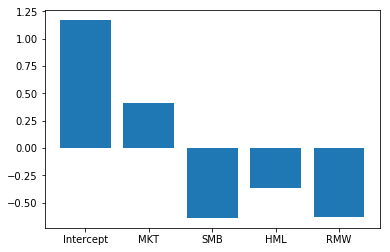

In [33]:
% matplotlib inline
import matplotlib.pyplot as plt
plt.bar(sig.index, sig.values)
#plt.plot(sig.values)

In addition, Fama-French Momentum Factor was added to the model as several practitioners and scholars have critized the no inclusion of the long-time accepted momentum effect in their overall 5-Factor model:

https://www.robeco.com/en/insights/2015/10/fama-french-5-factor-model-why-more-is-not-always-better.html

Once again, the model is quite robust according to its high coeficient of determination (0.76) and an overall F-Test low p-value suggesting model relevance. Furthemore, "Intercept" repeats as a positive and statistically significant coefficient showcasing an appropriate stock-picking and sector/industry/theme selection. The only pitfall of this new model is the fact that AIC and BIC are a tad higher than in our previous one or, in other words, we don't obtain explanatory gaisn from adding a new "momentum" factor to the predictors set.

In [34]:
import pandas as pd
import statsmodels.formula.api as sm
MKT = list(df.loc[:,'Mkt-RF']) # Market Premium
SMB = list(df.loc[:,'SMB']) # Size Premium
HML = list(df.loc[:,'HML']) # Value Premium
RMW = list(df.loc[:,'RMW']) # Quality Premium (High Op. Profitability Premium) 
CMA = list(df.loc[:,'CMA']) # Low CapEx Premium
MOM = list(df.loc[:,'Mom   ']) # Momentum Premium

Y = list(df.loc[:,'TR']-df.loc[:,'RF'])

dfr = pd.DataFrame({'MKT':MKT,'SMB':SMB,'HML':HML,'RMW':RMW,'CMA':CMA,'MOM':MOM,'Y':Y})


result = sm.ols(formula="Y ~ MKT + SMB + HML + RMW + CMA + MOM", data=dfr).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     25.81
Date:                Mon, 03 Dec 2018   Prob (F-statistic):           1.36e-13
Time:                        16:25:36   Log-Likelihood:                -89.556
No. Observations:                  56   AIC:                             193.1
Df Residuals:                      49   BIC:                             207.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1526      0.196      5.868      0.0

In [20]:
# Significant Factors
sig = result.params[result.pvalues.values<0.1]
sig

Intercept    1.152568
MKT          0.418899
SMB         -0.630793
RMW         -0.610110
dtype: float64

In [22]:
list(sig.index)

['Intercept', 'MKT', 'SMB', 'RMW']

<BarContainer object of 4 artists>

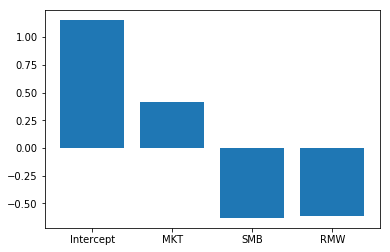

In [27]:
% matplotlib inline
import matplotlib.pyplot as plt
plt.bar(sig.index, sig.values)
#plt.plot(sig.values)

Looking into our worse AIC and BIC stats compared to our first model, the correlation matrix doesn't provide a good reason to leave it out as none of the correl factors seems to be dramatically important.

In [39]:
dfr.corr()

,CMA,HML,MKT,MOM,RMW,SMB,Y
CMA,1.000000,0.518085,-0.307633,0.017168,0.225890,-0.115271,-0.288849
HML,0.518085,1.000000,0.079173,-0.500897,-0.322842,0.109709,-0.088870
MKT,-0.307633,0.079173,1.000000,-0.337130,-0.546045,-0.064590,0.801707
MOM,0.017168,-0.500897,-0.337130,1.000000,0.322640,-0.116311,-0.127122
RMW,0.225890,-0.322842,-0.546045,0.322640,1.000000,-0.425420,-0.405085
SMB,-0.115271,0.109709,-0.064590,-0.116311,-0.425420,1.000000,-0.311610
Y,-0.288849,-0.088870,0.801707,-0.127122,-0.405085,-0.311610,1.000000


## Performance Analysis packages

### Pyfolio

In [69]:
import pyfolio as pf
%matplotlib inline

# silence warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

results = df
returns = df.loc[:,'TR']/100
#returns.index = returns.index.to_timestamp(how='end')
returns.head()

2011-08-31   -0.023
2011-09-30   -0.022
2011-10-31    0.067
2011-11-30    0.017
2011-12-31    0.022
Freq: M, Name: TR, dtype: float64

In [72]:
pf.create_returns_tear_sheet(returns,period='monthly')  

TypeError: create_returns_tear_sheet() got an unexpected keyword argument 'period'

Regrettably Pyfolio only works when we have daily obs

### FFN
links:
- https://github.com/pmorissette/ffn
- http://pmorissette.github.io/ffn/quick.html
- http://pmorissette.github.io/ffn/ffn.html

In [32]:
import ffn

# transform data:
returns =df['TR']/100 
returns.index = returns.index.to_timestamp(how='end')
prices = 100*(1 + returns).cumprod()
prices.head()

2011-08-31     97.700000
2011-09-30     95.550600
2011-10-31    101.952490
2011-11-30    103.685683
2011-12-31    105.966768
Freq: M, Name: TR, dtype: float64

In [125]:
# or using ffn utility function:
prices_ffn = ffn.to_price_index(returns)
prices.head()

2011-08-31     97.700000
2011-09-30     95.550600
2011-10-31    101.952490
2011-11-30    103.685683
2011-12-31    105.966768
Freq: M, Name: TR, dtype: float64

In [36]:
# crate stats object:
stats = ffn.calc_stats(prices)
stats

In [99]:
# extract info:
print('strategy cagr is %1.2f and sharpe is %1.2f'% (stats.cagr*100,stats.monthly_sharpe) )

strategy cagr is 18.57 and sharpe is 2.08


In [37]:
# printing year/month return table
stats.return_table

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,YTD
2011,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.022,0.067,0.017,0.022,0.084614
2012,0.037,0.039,0.005,0.001,-0.055,0.024,0.034,0.028,0.023,0.016,0.019,-0.007,0.172553
2013,0.051,0.038,0.038,0.028,0.028,-0.011,0.031,-0.028,0.018,0.033,0.014,0.015,0.283681
2014,-0.006,0.047,0.008,-0.001,0.014,0.013,-0.007,0.018,0.033,0.009,0.032,-0.009,0.159974
2015,0.002,0.034,0.003,0.016,0.047,-0.019,0.028,-0.043,-0.010,0.063,0.030,-0.004,0.151778
2016,-0.012,-0.007,0.020,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000706


In [103]:
# drawdown report:
stats.drawdown_details # length in days

,Start,End,Length,drawdown
0,2011-09-30 00:00:00,2011-10-31 00:00:00,31,-0.022
1,2012-05-31 00:00:00,2012-07-31 00:00:00,61,-0.055
2,2012-12-31 00:00:00,2013-01-31 00:00:00,31,-0.007
3,2013-06-30 00:00:00,2013-07-31 00:00:00,31,-0.011
4,2013-08-31 00:00:00,2013-10-31 00:00:00,61,-0.028
5,2014-01-31 00:00:00,2014-02-28 00:00:00,28,-0.006
6,2014-04-30 00:00:00,2014-05-31 00:00:00,31,-0.001
7,2014-07-31 00:00:00,2014-08-31 00:00:00,31,-0.007
8,2014-12-31 00:00:00,2015-02-28 00:00:00,59,-0.009
9,2015-06-30 00:00:00,2015-07-31 00:00:00,31,-0.019


In [111]:
# Important:
perf = prices.calc_stats() # ffn imports functions to be used with numpy/pandas objects
perf.stats

start                    2011-08-31 00:00:00
end                      2016-03-31 00:00:00
rf                                         0
total_return                         1.18267
cagr                                 0.18567
max_drawdown                          -0.055
calmar                               3.37582
mtd                                     0.02
three_month                       0.00070568
six_month                            0.09128
ytd                               0.00070568
one_year                            0.109139
three_year                          0.148631
five_year                            0.18567
ten_year                             0.18567
incep                                0.18567
daily_sharpe                         9.51056
daily_sortino                        21.7918
daily_mean                           3.67462
daily_vol                           0.386373
daily_skew                         -0.445108
daily_kurt                          0.516964
best_day  

Text(0.5,1,'Returns Histogram')

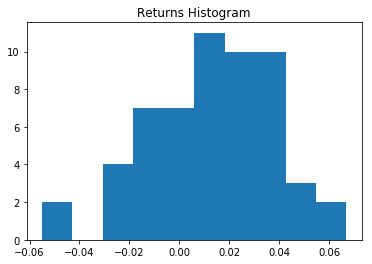

In [115]:
# Return Histogram
plt.hist(returns)
plt.title('Returns Histogram')

ImportError: matplotlib is required for plotting.

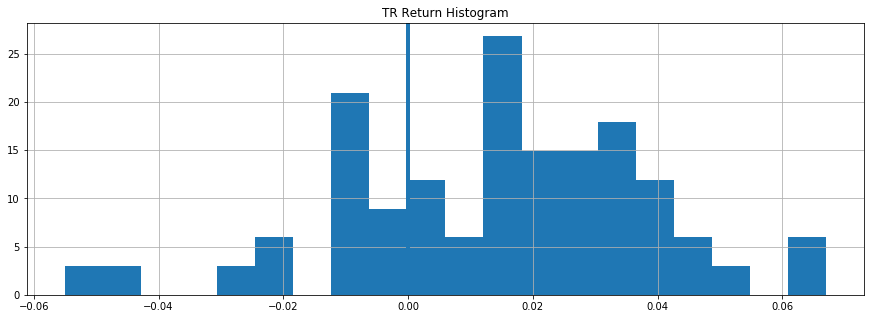

In [117]:
# using ffn
perf.plot_histogram()

<module 'matplotlib.pyplot' from 'C:\Users\Carlo\Anaconda3\envs\py27\lib\site-packages\matplotlib\pyplot.pyc'>

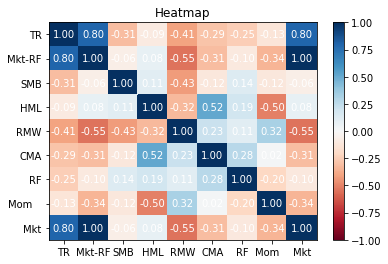

In [122]:
# Check Correlation matrix between Strategy (TR) and factors
ffn.plot_corr_heatmap(df)

### Comparing Strategy vs Benchmark

In [49]:
# transform data to get TR and BMK:
df['Mkt'] = df['Mkt-RF']-df['RF']
g_returns =df[['TR','Mkt']]/100 
g_returns.index = g_returns.index.to_timestamp(how='end')
g_prices = 100*(1 + g_returns).cumprod()
g_prices.head()

,TR,Mkt
2011-08-31,97.700000,92.480000
2011-09-30,95.550600,83.971840
2011-10-31,101.952490,92.377421
2011-11-30,103.685683,89.938657
2011-12-31,105.966768,89.542927


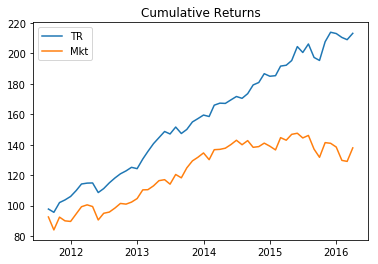

In [131]:
# Plotting Cumulative Returns
plt.plot(g_prices)
plt.title('Cumulative Returns')
plt.legend(g_prices.columns)

In [51]:
gstats = ffn.GroupStats(g_prices)

In [59]:
gstats.stats

,Mkt,TR
start,2011-08-31 00:00:00,2011-08-31 00:00:00
end,2016-03-31 00:00:00,2016-03-31 00:00:00
rf,0,0
total_return,0.491284,1.18267
cagr,0.0911115,0.18567
max_drawdown,-0.125477,-0.055
calmar,0.726119,3.37582
mtd,0.0689,0.02
three_month,-0.00396781,0.00070568
six_month,0.0469795,0.09128


In [69]:
gstat_sample = gstats.stats.loc[['total_return','cagr','yearly_vol','monthly_sharpe','monthly_sortino','max_drawdown','avg_drawdown',
                 'avg_drawdown_days'],:]
gstat_sample

,Mkt,TR
total_return,0.491284,1.18267
cagr,0.0911115,0.18567
yearly_vol,0.128016,0.100872
monthly_sharpe,0.723118,2.07537
monthly_sortino,1.2994,4.75537
max_drawdown,-0.125477,-0.055
avg_drawdown,-0.0503734,-0.0200342
avg_drawdown_days,101.333,45.5833
